In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('data/bmw.csv')

In [3]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


<Axes: >

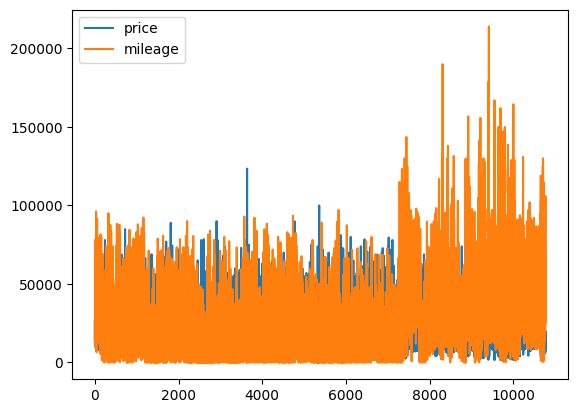

In [5]:
# let's see the relationship between price and mileage...

data[['price', 'mileage']].plot()

Text(0, 0.5, 'Mileage')

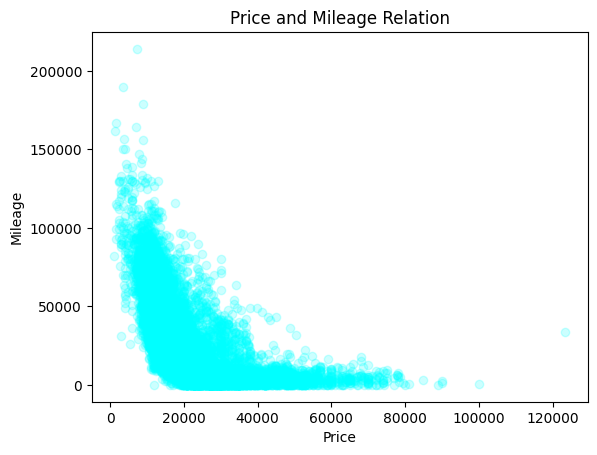

In [6]:
# Price on x axis and Mileage on y axis

plt.scatter(x=data['price'], y=data['mileage'], c='cyan', alpha=0.2)
plt.title('Price and Mileage Relation')
plt.xlabel('Price')
plt.ylabel('Mileage')

In [7]:
# let's see the general correlation...

correlation = data.corr()
correlation['price'].sort_values(ascending=False)

C:\Users\knowl\AppData\Local\Temp\ipykernel_9140\4115550656.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


price         1.000000
year          0.623756
engineSize    0.460196
tax           0.263484
mpg          -0.204882
mileage      -0.605397
Name: price, dtype: float64

See, The relation between price and mileage is negative that means as the mileage is keep increasing the price he is getting is lower...

So yeah here something is clicking: The author said that he want to find that when should his friend sell his car... 

Let's find some more correlation...

In [8]:
correlation['year'].sort_values(ascending=False)

year          1.000000
price         0.623756
tax           0.025200
engineSize   -0.026337
mpg          -0.071762
mileage      -0.774382
Name: year, dtype: float64

In [9]:
correlation['tax'].sort_values(ascending=False)

tax           1.000000
engineSize    0.429616
price         0.263484
year          0.025200
mileage      -0.170747
mpg          -0.351798
Name: tax, dtype: float64

In [10]:
correlation['engineSize'].sort_values(ascending=False)

engineSize    1.000000
price         0.460196
tax           0.429616
mileage      -0.002540
year         -0.026337
mpg          -0.399844
Name: engineSize, dtype: float64

In [11]:
correlation['mpg'].sort_values(ascending=False)

mpg           1.000000
mileage       0.118609
year         -0.071762
price        -0.204882
tax          -0.351798
engineSize   -0.399844
Name: mpg, dtype: float64

`What does mileage means?`

Mileage generally refers to the total number of miles traveled by a vehicle, typically an automobile. It is often used to describe the efficiency of a vehicle in terms of fuel consumption, with higher mileage indicating that the vehicle can travel more miles per gallon of fuel. It can also refer to the total distance traveled by a person or group, such as in the context of a road trip or vacation.

Text(0, 0.5, 'Year')

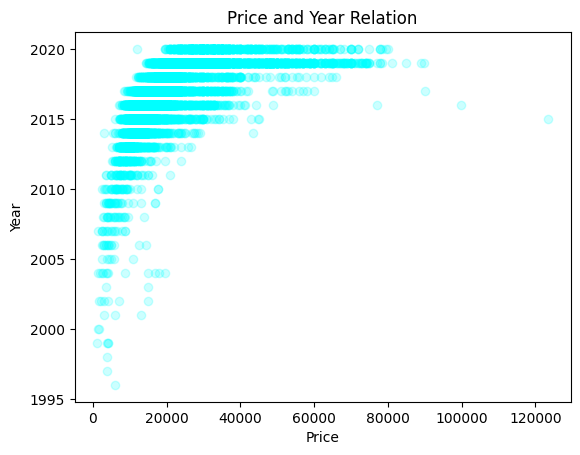

In [15]:
plt.scatter(x=data['price'], y=data['year'], c='cyan', alpha=0.2)
plt.title('Price and Year Relation')
plt.xlabel('Price')
plt.ylabel('Year')

I don't know what does year represent Is it the year in which car is purchased or is it the year in which the car is sold???

Text(0, 0.5, 'Engine Size')

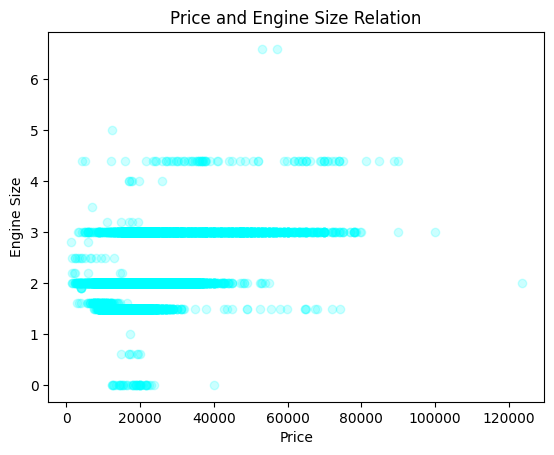

In [18]:
plt.scatter(x=data['price'], y=data['engineSize'], c='cyan', alpha=0.2)
plt.title('Price and Engine Size Relation')
plt.xlabel('Price')
plt.ylabel('Engine Size')

<Axes: xlabel='price', ylabel='engineSize'>

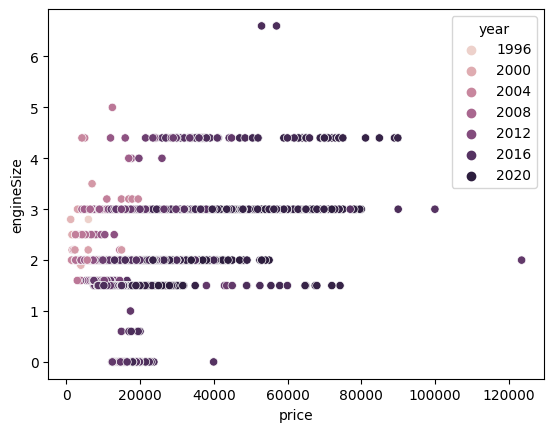

In [20]:
sns.scatterplot(data=data, x='price', y='engineSize', hue='year')

<Axes: xlabel='price', ylabel='mileage'>

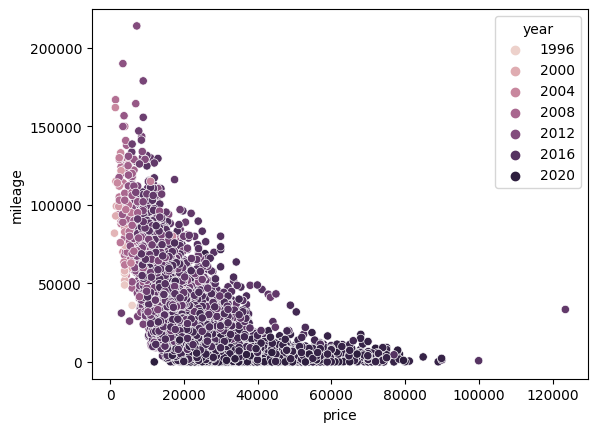

In [25]:
sns.scatterplot(data=data, x='price', y='mileage', hue='year') # Iska toh clear hai ki jitna jyada chali hai utna kam price mila. Aur dusri baat jitni purani hogi utni jyada chali bhi toh hogi...

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


<Axes: xlabel='price', ylabel='mileage'>

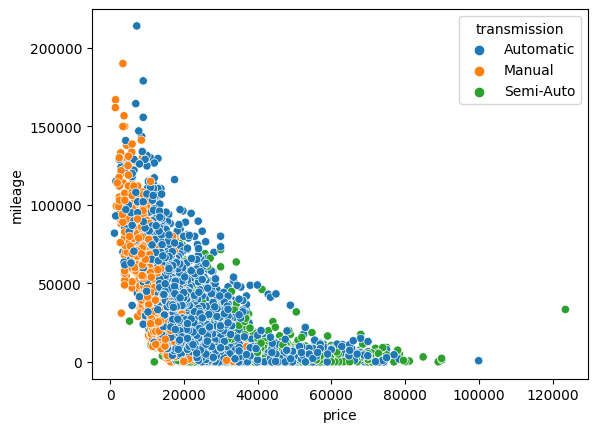

In [28]:
sns.scatterplot(data=data, x='price', y='mileage', hue='transmission')

<Axes: xlabel='price', ylabel='mileage'>

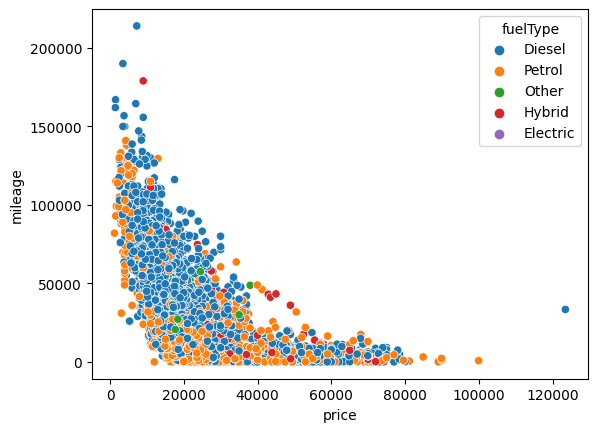

In [30]:
sns.scatterplot(data=data, x='price', y='mileage', hue='fuelType')

In [34]:
data['model'].unique()

array([' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3'], dtype=object)

Let's merge all the data and try to do some of final things that author is trying to achieving...